In [ ]:
% Show how to create a scene starting with surface
% reflectances and an illuminant.
%
% DHB/BW


In [1]:
%% Initialize the ISETBIO work environment
ieInit;

In [2]:
%% Define wavelength spacing we will use
% Wavelength in nm
dwave = 10;
wave = 400:dwave:700;  

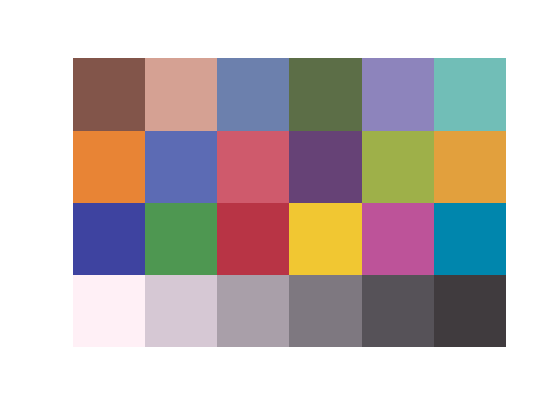

[Warning: MATLAB has disabled some advanced graphics rendering features by
switching to software OpenGL. For more information, click <a
href="matlab:opengl('problems')">here</a>.]


In [3]:
%% Read in a file with MCC reflectances
%
% The reflectances could be anything. For this example we load in the
% Macbeth Color Checker Chart.  
% This function returns a 31 x 24 matrix, which is length(wave) x 24 patches
macbethReflectance = macbethReadReflectance(wave);

% Convert the reflectances to a row x col x nwave matrix
macbethReflectance = reshape(macbethReflectance',4,6,31);

% Expand the image so that each point becomes a patch
patchSize = 12;
macbethReflectance = imageIncreaseImageRGBSize(macbethReflectance,patchSize);

% Look at the result using imageSPD
% This utility renders spectral data into a window
imageSPD(macbethReflectance);

In [6]:
%% Read in a D65 spectrum
illEnergy = ieReadSpectra('D65',wave); 

% Scale it so that it luminance is 100 cd/m2.
lum = ieLuminanceFromEnergy(illEnergy',wave)
illEnergy = 100*illEnergy/lum;


lum =

   7.2158e+06


In [7]:
%% Create an empty scene where we will place the radiance data and illuminant
scene = sceneCreate('default');
scene = sceneClearData(scene);


In [9]:
%% Compute the scene spectral radiance given the reflectance and illuminant

nRows = size(macbethReflectance,1); nCols = size(macbethReflectance,2);
for i = 1:nRows
    for j = 1:nCols
        radianceEnergy(i,j,:) = illEnergy.*squeeze(macbethReflectance(i,j,:));
    end
end
radiancePhotons = Energy2Quanta(wave,radianceEnergy);


In [11]:
%% Put in the photons and the illuminant
%
% This now makes the implied surface reflectance 
% what we started with, as we check a little further
% down.
scene = sceneSet(scene,'photons',radiancePhotons);
scene = sceneSet(scene,'illuminant energy',illEnergy);

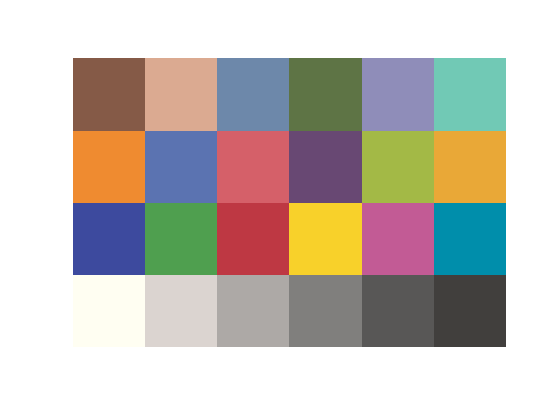

In [12]:
%% Look at the image contained in our beautiful scene 
%
% This will replace what was in the first figure we had
% and should look the same.
sceneShowImage(scene);